<div style="font-size: 30px">
    <font color='Blue'> <b>Seasonal Shifts: Understanding Vegetable Price Changes Across Time</b></font> 

<img src="Vegetable-Prices.jpg" style="width:1000px;height:550px"/>

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Problem Statement](#sub_section_1_1_1)
    * [1.2 Objectives](#section_1_2)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Conclusion](#chapter6)</b>
* <b>[7. References](#chapter7)<b>

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

Seasonal price variations in vegetables are primarily driven by supply and demand. During the 
peak growing season, when vegetables are abundant, prices tend to be lower. Conversely, in the 
off-season, when production decreases due to unfavourable weather conditions, prices increase. 
This pattern is a fundamental economic principle, but several factors can influence its dynamics. 
Weather plays a crucial role in agriculture. Unseasonably cold or hot weather can delay planting 
or harvesting, reducing the supply of certain vegetables and leading to higher prices. Vegetables 
that are not in season locally may be imported from other regions or countries. The cost of 
transportation, including fuel prices, can significantly affect the final price of these vegetables. 
Consumer preferences can also influence vegetable prices. For example, the demand for certain 
vegetables may increase around specific holidays, leading to temporary price hikes. 
Climate change is increasingly affecting agricultural patterns worldwide, leading to more 
unpredictable weather conditions and impacting the predictability of seasonal price variations. 
Extreme weather events, such as droughts, floods, and hurricanes, can devastate crops, 
reducing supply and driving up prices. Additionally, rising global temperatures can shift the 
growing seasons for many vegetables, affecting their availability and price.

#### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>


Vegetable prices are subject to a wide range of factors, including weather conditions, demand, and 
the cost of labour and transportation. However, one of the most significant factors affecting the 
price of vegetables is the season. Seasonal variations can lead to significant fluctuations in the 
availability and cost of different types of vegetables. Understanding these seasonal patterns in 
vegetable prices can help producers make proactive decisions to optimize crop production, 
resource management, marketing strategies, risk mitigation, and financial planning 


#### 1.1.2 Objectives <a class="anchor" id="section_1_2"></a>

1. Price Trend Analysis: Analyze the historical price trends of different vegetables to identify 
patterns and seasonal variations. 
2. Seasonal Impact Assessment: Determine the impact of seasons on vegetable prices and 
explore any notable seasonal price fluctuations. 
3. Correlation Study: Investigate correlations between vegetable prices to understand how 
changes in one vegetable's price may affect others. 
4. Insights Generation: Extract actionable insights and recommendations for stakeholders in 
the agricultural sector to optimize pricing strategies and improve market outcomes. 

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [1]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the `titles.csv` file. To better manipulate and analyse the `titles.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `titles_import`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [2]:
# loading dataset
prices_df = pd.read_csv("prices.csv", index_col=False)
prices_df.head(2)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25


To set the maximum number of columns to be displayed, the `pd.set_option()` function will be put in place.

In [3]:
pd.set_option("display.max_columns", None)

<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe will be made using the prices_df.copy() method and referred to as `prices_copy_df`.
</div>

In [5]:
# The copy of the dataframe
prices_copy_df = prices_df.copy()

First we are looking at the shape of the dataframe by using `.shape`.

In [6]:
# Displays the number of rows and columns
prices_copy_df.shape

(287, 11)

**Results** : The dataset consists of 287 rows (observations) and 11 columns (features). 

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [7]:
## Display summary information about the DataFrame.
prices_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

After using the `info()`, we notice some issues with the format of the Price Dates and prices of vegetables

In [8]:
# Convert 'Price Dates' column from string format to datetime format
# Specify the format of the input date strings as day-month-year
prices_copy_df['Price Dates'] = pd.to_datetime(prices_copy_df['Price Dates'], format='%d-%m-%Y')

**Result:** The column of date strings ('Price Dates') in a DataFrame (prices_copy_df) is converted into datetime objects using a specified date format ('%d-%m-%Y') which results in the column becoming standardized

Standardizing the Price Dates column improves the quality, reliability and usability of out data, which makes it easier to derive meaningful insights and make informed decisions based on time-related information within the dataset

In [9]:
prices_copy_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25
1,2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25
2,2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25
3,2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25
4,2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25


In [10]:
# Specify columns to convert to float
columns_to_convert = ['Tomato', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi',	'Elephant Yam (Suran)']

# Convert selected columns to float
prices_copy_df[columns_to_convert] = prices_copy_df[columns_to_convert].astype(float)

**Result:** The columns Tomato, Potato, Brinjal, Garlic, Peas, Methi, and Elephant Yam (Suran) in the prices_copy_df DataFrame will be converted to float data type


Representing vegetable prices to be in float format offers precision, which is crucial for accurately reflecting decimal values in prices (e.g 1.99 Rand). Using float format ensures that calculations involving prices, such as total costs or average prices, are accurate and free from rounding errors

In [11]:
prices_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price Dates             287 non-null    datetime64[ns]
 1   Bhindi (Ladies finger)  287 non-null    float64       
 2   Tomato                  287 non-null    float64       
 3   Onion                   287 non-null    float64       
 4   Potato                  287 non-null    float64       
 5   Brinjal                 287 non-null    float64       
 6   Garlic                  287 non-null    float64       
 7   Peas                    287 non-null    float64       
 8   Methi                   287 non-null    float64       
 9   Green Chilli            287 non-null    float64       
 10  Elephant Yam (Suran)    287 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 24.8 KB


In [12]:
prices_copy_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,2023-01-01,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0
1,2023-01-02,35.0,16.0,22.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0
2,2023-01-03,35.0,16.0,21.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0
3,2023-01-04,30.0,16.0,21.0,22.0,25.0,55.0,25.0,7.0,40.0,25.0
4,2023-01-08,35.0,16.0,20.0,21.0,25.0,55.0,22.0,6.0,35.0,25.0


The `.describe()` method is a fundamental tool used for generating descriptive statistics

In [13]:
prices_copy_df.describe()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,2023-07-04 21:54:33.867595776,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
min,2023-01-01 00:00:00,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,2023-04-06 12:00:00,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,2023-07-04 00:00:00,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,2023-10-01 12:00:00,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,2024-01-01 00:00:00,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000
std,NaN,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973


Under the category of "Methi" ,there is an outlier in the maximum value, which we will replace with the average value of "Methi".

In [14]:
# Set the outlier value in the 'Methi' column to NaN at index 148
prices_copy_df.loc[148, 'Methi'] = np.nan

# Calculate the average value of the 'Methi' column, rounded to 2 decimal places
average = round(prices_copy_df['Methi'].mean(), 2)

# Fill NaN values in the 'Methi' column with the calculated average
prices_copy_df['Methi'] = prices_copy_df['Methi'].fillna(average)

Result: The outlier value at index 148 in the 'Methi' column is replaced with the average value of the 'Methi' column, and any other missing (NaN) values in the 'Methi' column are also filled with this average value

## 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

In this section we will be studying, exploring, and visualizing information to derive important insights from our data. First we find the mean prices of each vegetable per month. This will be achieved by grouping the data by month and finding the mean price of each vegetable for each month.

In [15]:
# Extract month from 'Price Dates' column
prices_copy_df['Month'] = prices_copy_df['Price Dates'].dt.month

# Filter the DataFrame to include only rows where the month is 1 to 12: January to December.
filtered_df = prices_copy_df[prices_copy_df['Month'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])]

# Drop the 'Price Dates' column to exclude it from the result
filtered_df.drop('Price Dates', axis=1, inplace=True)

# Group by month and find the mean value for each month
mean_by_month = filtered_df.groupby('Month').mean()

print(mean_by_month)

       Bhindi (Ladies finger)     Tomato      Onion     Potato    Brinjal  \
Month                                                                       
1                   38.277778  16.111111  17.416667  20.388889  39.444444   
2                   35.979167  16.000000  12.187500  14.958333  32.750000   
3                   32.980769  16.000000  11.384615  13.615385  22.153846   
4                   30.229167  16.000000   9.354167  15.500000  24.166667   
5                   21.620000  16.000000  10.680000  20.320000  24.400000   
6                   23.220000  16.000000  13.720000  20.280000  32.800000   
7                   25.160000  16.000000  16.560000  19.720000  34.200000   
8                   24.040000  16.000000  21.480000  20.200000  31.000000   
9                   21.652174  16.000000  23.347826  18.565217  24.000000   
10                  28.980769  16.000000  32.846154  19.884615  40.769231   
11                  28.543478  16.000000  44.739130  19.913043  24.391304   

**Result:** the cell above resulted in vegetable mean prices for each month allowing us to visualise it in a bar graph to assess the flactuation in the vegetable prices for each month.


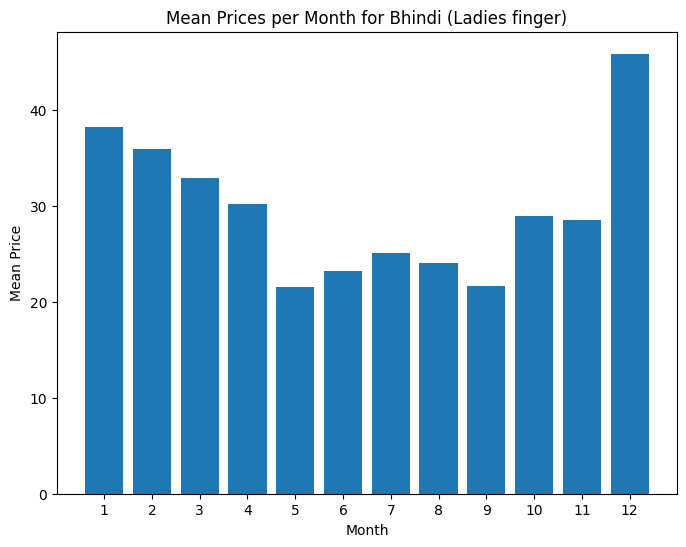

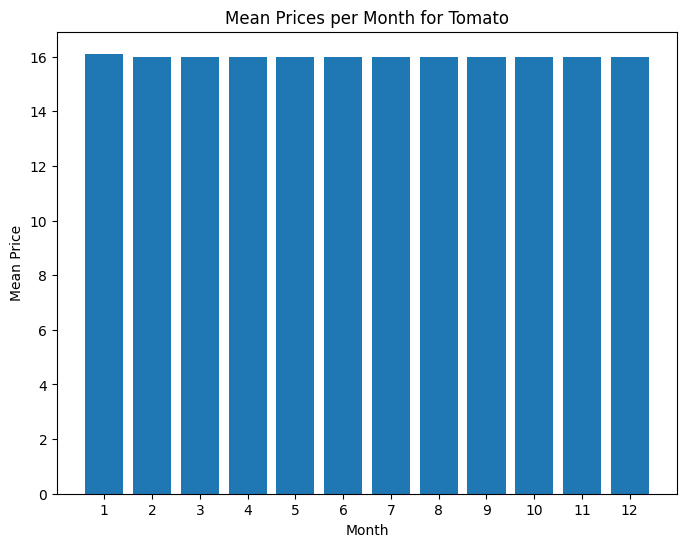

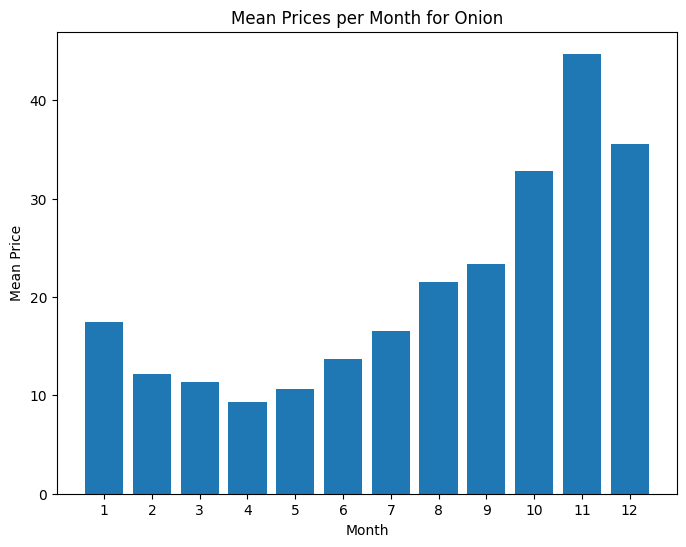

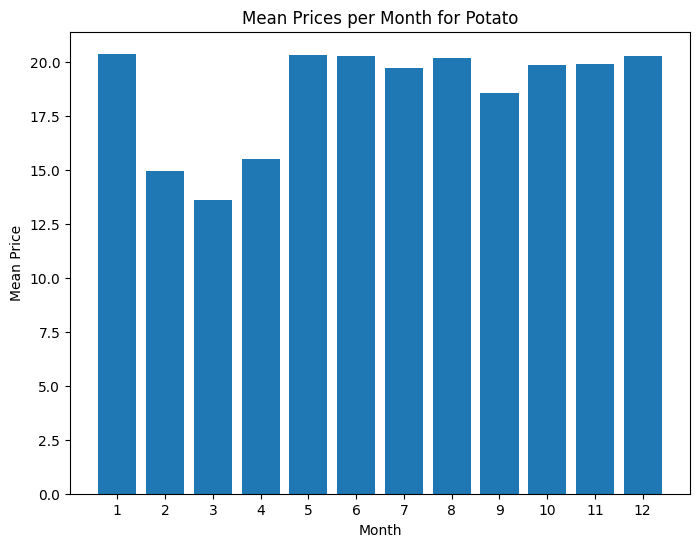

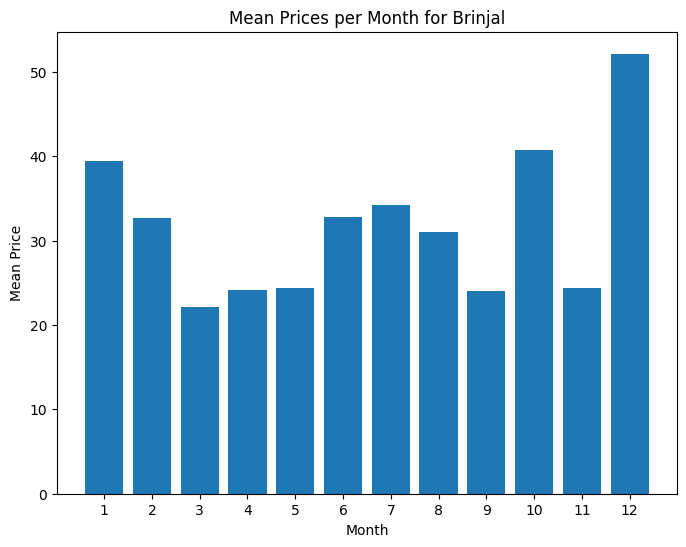

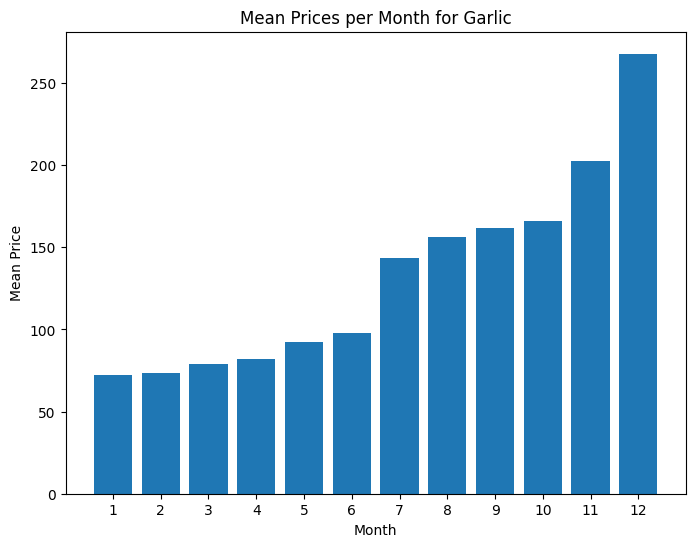

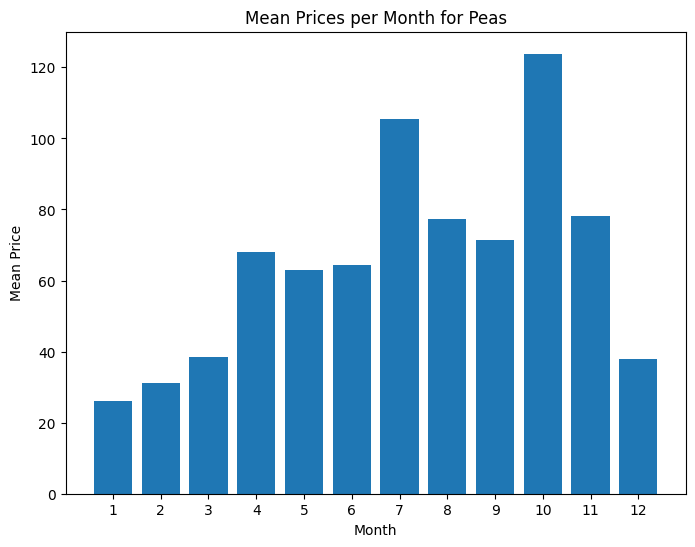

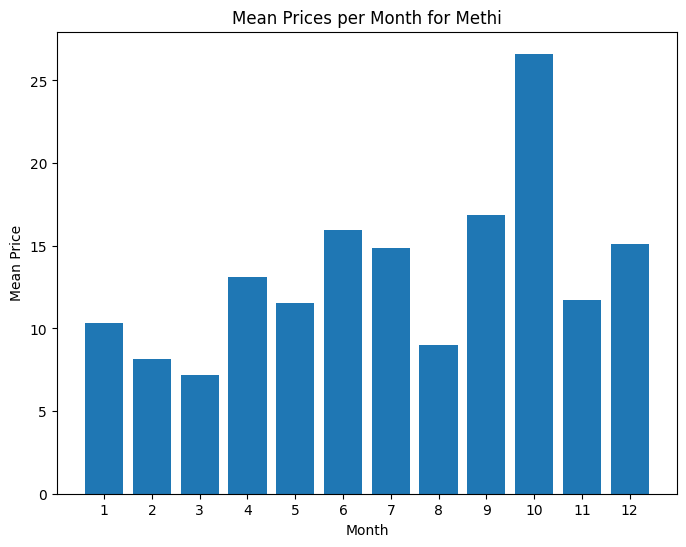

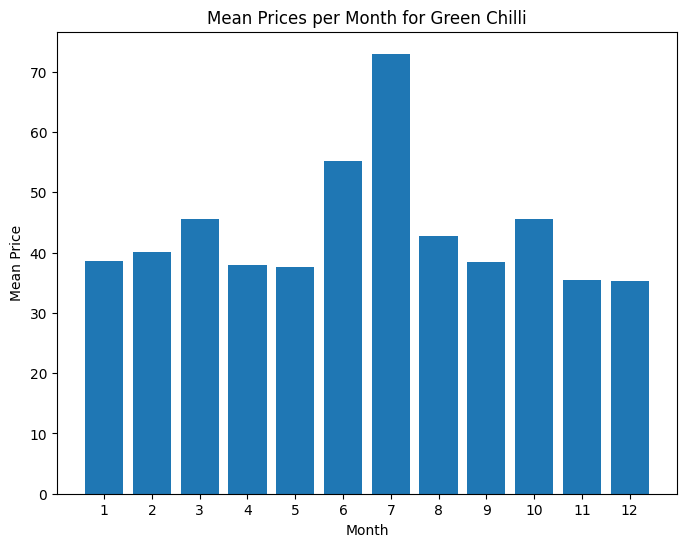

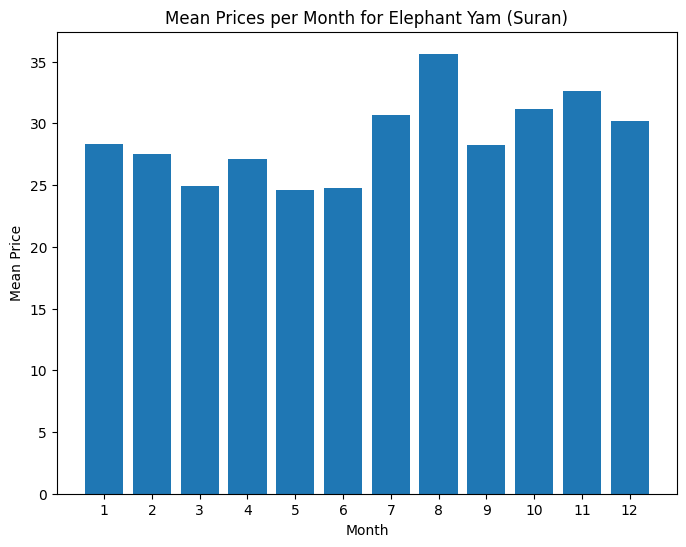

In [16]:
# Plotting
for column in mean_by_month.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(mean_by_month.index,mean_by_month[column])
    plt.title(f'Mean Prices per Month for {column}')
    plt.xlabel('Month')
    plt.ylabel('Mean Price')
    plt.xticks(mean_by_month.index)
    plt.show()

**Result**

From the bar graphs above, we observe that:
1. `Potatoes:` The price of potatoes consistently remains high throughout the year, with a gradual decrease observed during autumn
2. `Onions:` The price of onions decreased during the summer and as winter approached, the price gradually increased, possibly due to reduced availability during the colder months
3. `Peas:` The price of peas shows an upward trend during summer, fluctuates through autumn and winter, and reaches its peak in spring
4. `Tomatoes:` It appears that the prices tomatoes underwent minor fluctuations thoughtout the whole year as the mean price exhibited a consistent trend without significant changes
5. `Green Chili:` The price of green chili remains consistently high across different seasons, with a notable increase during the winter months
6. `Garlic:` The price of garlic appears to be at its lowest during summer and gradually increases until it reaches its peak during spring
7. `Brinjal (Eggplant):` The price of Brinjal shows a gradual decline during autumn, followed by a gradual increase starting from winter and reaching its peak during spring.
8. `Bhindi (Okra):` The price of Bhindi typically decreases during summer and throughout autumn and starts to gradually increase from the winter to spring
9. `Methi (Fenugreek):` The price of methi tends to gradually decrease in summer, then fluctuates in autumn and winter before rising to its highest point in spring. 
10. `Elephant Yam:` The price of elephant yam typically remains high but shows a decrease approaching autumn and remains high during late winter.


**Looking at the Bar graphs:** 

1. The price of tomatoes it stable through out the year while for the other vegetables it flactuates and for some it increases      gradually from January to december.
2. This tells us that as much as seasons play a big role in the prices of vegetables as far as harvesting and optimal conditions    for growth are concerned, other factors do contribute to the flactuation of the prices as well.

Pair plot of the different vegetable mean prices per month

**the pair plot will help us visualise:**

1. The relationship between the vegetable prices
2. distribution of individual vegetable prices over a year period
3. identify outliers
4. provide a quick overview of how variables interact with each other.

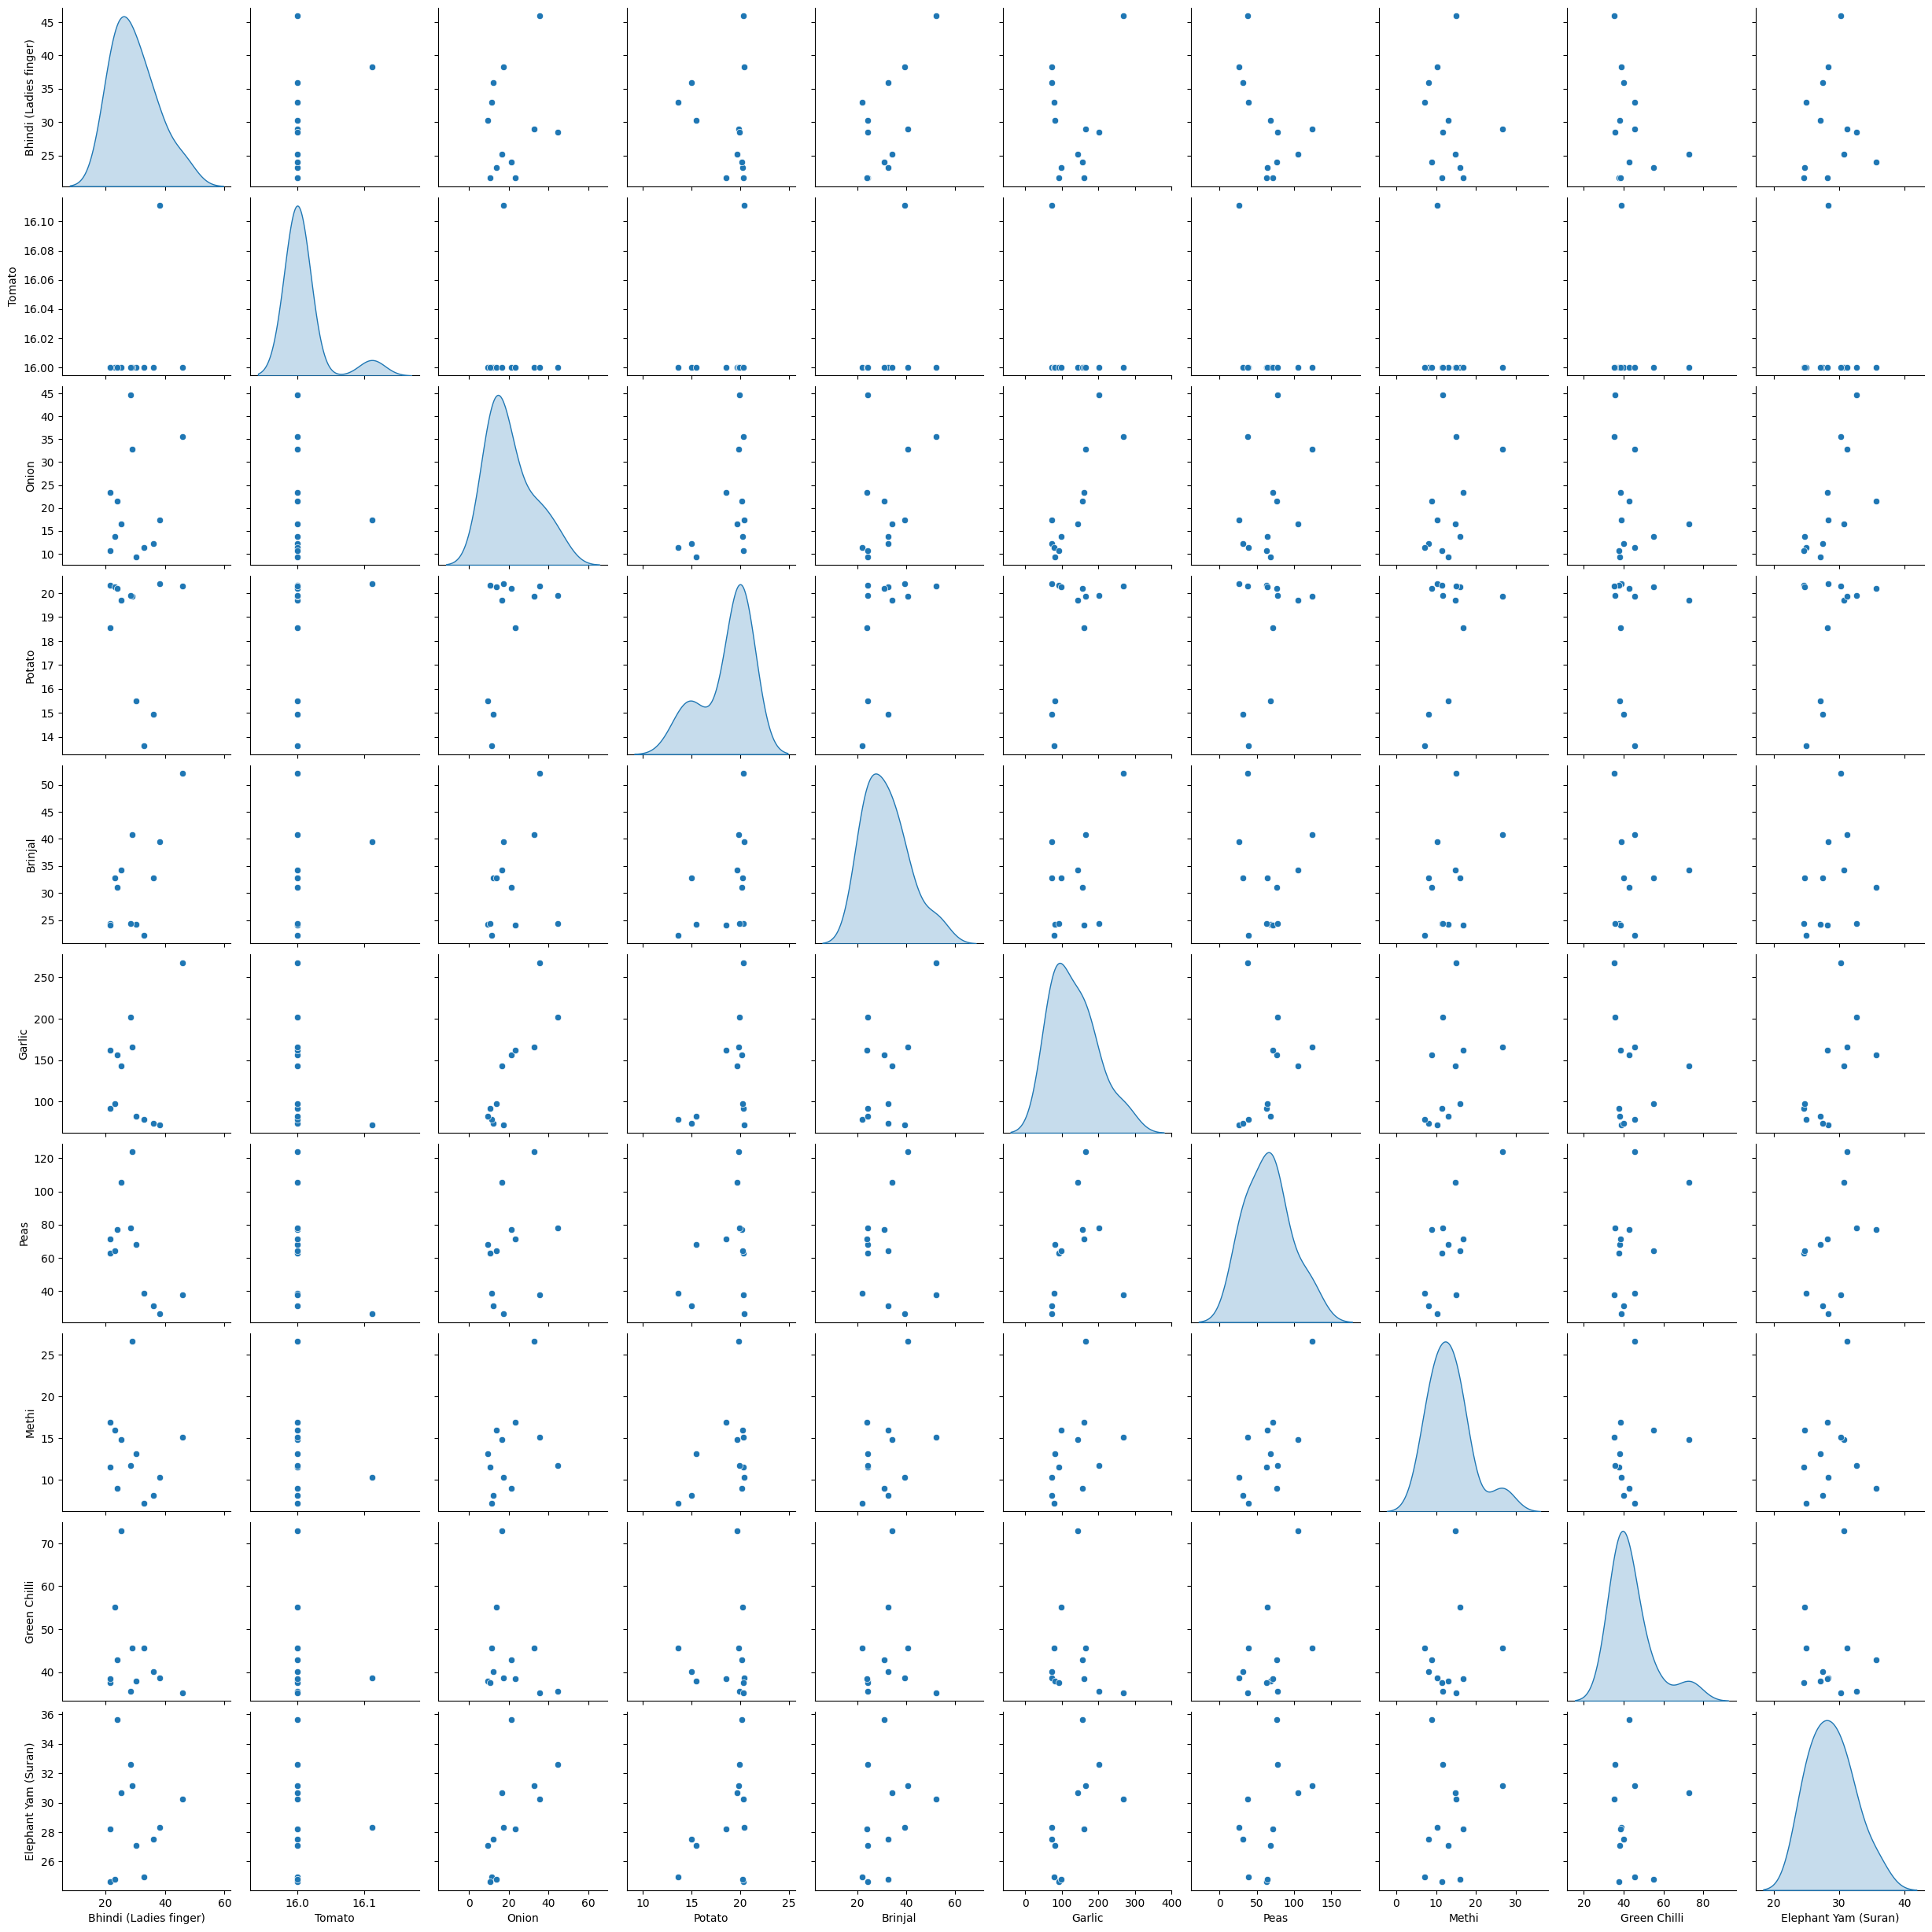

In [17]:
# Create pair plot of our filtered data frame
sns.pairplot(mean_by_month, diag_kind='kde', kind='scatter')

# Show the plot
plt.show()

**Result:**

1. There is a normal distribution in the mean prices of Bhindi, onion, Brinjal, Garlic, Peas, and Elephant Yam from Januray to December.
2. The distribution is skewed to the right in the mean prices of Green Chilli, Methi, and Tomatoes.Lower values are clustered in the hill of the distribution, while extreme values are in the long right tail.
3. The distribution is skewed to the left in the mean prices of patoes. Higher values are clustered in the hill of the distribution, while extreme values are in the long left tail.


T